In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
import timeit

import os
import sys
root_path = os.getcwd() + "/scripts/personal/rick"
sys.path.append(str(root_path))

from prime_Functions_Andrew import *
from prime_Functions_quditV2 import *
np.set_printoptions(linewidth=200)

In [5]:
### Simulation bucket_filling_qudit without physical noise

# First run will alway be slow due to needing to pre-compile some of the functions

# choose Hamiltonian
P,cc = random_pauli_hamiltonian(20,[3,3,3])
#P,cc = read_luca_test_2("./Hamiltonians/"+"Hams"+"/"+"Open"+"/"+ "D5" +".txt",dims=[2,2,2,2,5])
#P,cc = read_luca_test_2("./Hamiltonians/"+"Hams"+"/"+"Periodic"+"/"+ "E_total_D5_Rick" +".txt",dims=5)
p,q = P.paulis(),P.qudits()

# sort Hamiltonian for calculation
P,cc,pauli_block_sizes = sort_hamiltonian(P,cc)

# state
psi = ground_state(P,cc)

# simulation settings
shots = 12801
D = {}
part_func = weighted_vertex_covering_maximal_cliques
full_simulation = False
general_commutation = True
intermediate_results_list = [6,12,25,50,100,200,400,800,1600,3200,6400,12800]
update_steps = np.array([6,12,25,50,100,200,400,800,1600,3200,6400,12800,25600,51200,102400])
allocation_mode = 'set'
mcmc_shot_scale = 0
N = 500
N_max = 4001
p_noise = 0

# simulation
S,X,xxx,CG,X_list,S_list,D = bucket_filling_qudit(P,cc,psi,shots,part_func,pauli_block_sizes,
                                                  full_simulation=full_simulation,update_steps=update_steps,
                                                  general_commutation=general_commutation,D=D,
                                                  M_list = intermediate_results_list,
                                                  allocation_mode = allocation_mode,
                                                  mcmc_shot_scale = mcmc_shot_scale,
                                                  N_mcmc = N, N_mcmc_max = N_max,p_noise = p_noise,Q_progress_bar=False)

# results
print('True mean:',Hamiltonian_Mean(P,cc,psi).real)
if not X is None:
	print('Est. mean:',sum(cc[i0]*sum(X[i0,i0,i1]*math.e**(2*1j*math.pi*i1/P.lcm) for i1 in range(P.lcm))/sum(X[i0,i0,i1] for i1 in range(P.lcm)) if sum(X[i0,i0,i1] for i1 in range(P.lcm))>0 else 0 for i0 in range(p)).real)
print('True error:',np.sqrt(np.sum(scale_variances(variance_graph(P,cc,psi),S).adj)).real)
if not X is None:
	print('Est. error:',np.sqrt(np.sum(scale_variances(graph(bayes_covariance_graph(X,np.array(cc),CG.adj,p,pauli_block_sizes,int(P.lcm),N=N ,N_max=N_max)),S).adj)).real)
print()
print()
print()


100%|██████████| 12801/12801 [00:31<00:00, 404.47it/s] 


True mean: -15.920904644691584
Est. mean: -15.623125994512545
True error: 0.1896366029258118
Est. error: 0.19088371966204842





In [6]:
# evaluate intermediate data
results = np.zeros((len(intermediate_results_list),3))
vg = variance_graph(P,cc,psi)
for k,X in enumerate(X_list):
    print('k',k)
    S = S_list[k]
    results[k,0] = sum(cc[i0]*sum(X[i0,i0,i1]*math.e**(2*1j*math.pi*i1/P.lcm) for i1 in range(P.lcm))/sum(X[i0,i0,i1] for i1 in range(P.lcm)) if sum(X[i0,i0,i1] for i1 in range(P.lcm))>0 else 0 for i0 in range(p)).real
    results[k,1] = np.sqrt(np.sum(scale_variances(graph(bayes_covariance_graph(X,np.array(cc),CG.adj,p,pauli_block_sizes,int(P.lcm),N=N ,N_max=N_max)),S).adj)).real
    results[k,2] = np.sqrt(np.sum(scale_variances(vg,S).adj)).real

k 0
k 1
k 2
k 3
k 4
k 5
k 6
k 7
k 8
k 9
k 10
k 11


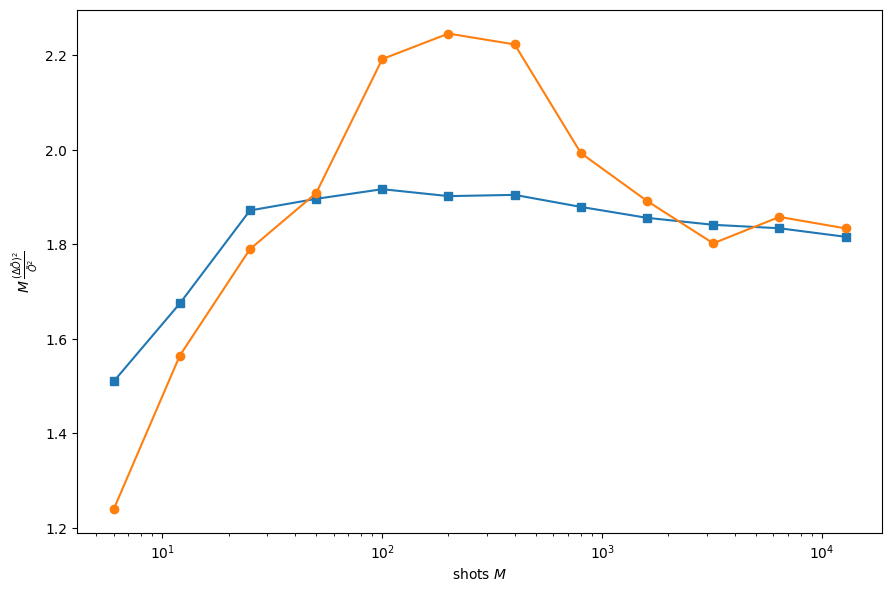

In [ ]:
x_dat = M_list
y_dat = np.zeros(len(intermediate_results_list))
y_true_dat = np.zeros(len(intermediate_results_list))

H_mean = Hamiltonian_Mean(P,cc,psi).real

fig, ax = plt.subplots(figsize=(9,6))

for j in range(len(intermediate_results_list)): 
    y_dat[j] = results[j,1]**2 * intermediate_results_list[j]/ (H_mean)**2  
    y_true_dat[j] = results[j,2]**2 * intermediate_results_list[j]/ (H_mean)**2
        
ax.plot(x_dat, y_true_dat, marker='s',label='True Error')
ax.plot(x_dat, y_dat, marker='o',label='Estimated Error')
ax.set_xscale('log')
ax.set_ylabel(r'$M \, \frac{(\Delta \tilde{O})^2}{\tilde{O}^2}$')
ax.set_xlabel(r'shots $M$')
    
plt.tight_layout(pad=1, w_pad=1, h_pad=1)
plt.show()

In [ ]:
### Simulation bucket_filling_qudit WITH physical noise

# First run will alway be slow due to needing to pre-compile some of the functions

# choose Hamiltonian
P,cc = random_pauli_hamiltonian(40,[3,3,3])
#P,cc = read_luca_test_2("./Hamiltonians/"+"Hams"+"/"+"Open"+"/"+ "D5" +".txt",dims=[2,2,2,2,5])
#P,cc = read_luca_test_2("./Hamiltonians/"+"Hams"+"/"+"Periodic"+"/"+ "E_total_D5_Rick" +".txt",dims=5)
p,q = P.paulis(),P.qudits()

# sort Hamiltonian for calculation
P,cc,pauli_block_sizes = sort_hamiltonian(P,cc)

# state
psi = ground_state(P,cc)

# simulation settings
shots = 12801
D = {}
part_func = weighted_vertex_covering_maximal_cliques
full_simulation = False
general_commutation = True
intermediate_results_list = [6,12,25,50,100,200,400,800,1600,3200,6400,12800]
update_steps = np.array([6,12,25,50,100,200,400,800,1600,3200,6400,12800,25600,51200,102400])
allocation_mode = 'set'
mcmc_shot_scale = 0
N = 500
N_max = 4001
p_noise = 0.01

# simulation
S,X,xxx,CG,X_list,S_list,D = bucket_filling_qudit(P,cc,psi,shots,part_func,pauli_block_sizes,
                                                  full_simulation=full_simulation,update_steps=update_steps,
                                                  general_commutation=general_commutation,D=D,
                                                  M_list = intermediate_results_list,
                                                  allocation_mode = allocation_mode,
                                                  mcmc_shot_scale = mcmc_shot_scale,
                                                  N_mcmc = N, N_mcmc_max = N_max,p_noise = p_noise,Q_progress_bar=False)
# calibration simulation
error_correction = error_correction_estimation(P,cc,X,xxx,p_noise)

# results
print('True mean:',Hamiltonian_Mean(P,cc,psi).real)
if not X is None:
	print('Est. mean:',sum(cc[i0]*sum(X[i0,i0,i1]*math.e**(2*1j*math.pi*i1/P.lcm) for i1 in range(P.lcm))/sum(X[i0,i0,i1] for i1 in range(P.lcm)) if sum(X[i0,i0,i1] for i1 in range(P.lcm))>0 else 0 for i0 in range(p)).real)
print('True error (without correction):',np.sqrt(np.sum(scale_variances(variance_graph(P,cc,psi),S).adj).real))
if not X is None:
	print('Est. error:',np.sqrt(np.sum(scale_variances(graph(bayes_covariance_graph(X,np.array(cc),CG.adj,p,pauli_block_sizes,int(P.lcm),N=N ,N_max=N_max)),S).adj).real + error_correction))
print()
print()
print()


100%|███████████████████████████████████████████████████████████████████████████| 12801/12801 [01:31<00:00, 139.57it/s]


True mean: -22.956334458286655
Est. mean: -22.680314797852372
True error (without correction): 0.2924013657105405
Est. error: 0.38944311056384684





In [ ]:
# evaluate intermediate data
results = np.zeros((len(intermediate_results_list),4))
vg = variance_graph(P,cc,psi)
for k,X in enumerate(X_list):
    print('k',k)
    S = S_list[k]
    results[k,0] = sum(cc[i0]*sum(X[i0,i0,i1]*math.e**(2*1j*math.pi*i1/P.lcm) for i1 in range(P.lcm))/sum(X[i0,i0,i1] for i1 in range(P.lcm)) if sum(X[i0,i0,i1] for i1 in range(P.lcm))>0 else 0 for i0 in range(p)).real
    results[k,1] = np.sqrt(np.sum(scale_variances(graph(bayes_covariance_graph(X,np.array(cc),CG.adj,p,pauli_block_sizes,int(P.lcm),N=N ,N_max=N_max)),S).adj)).real
    results[k,2] = np.sqrt(np.sum(scale_variances(vg,S).adj)).real
    results[k,3] = error_correction_estimation(P,cc,X,xxx[0:intermediate_results_list[k]],p_noise)

k 0
k 1
k 2
k 3
k 4
k 5
k 6
k 7
k 8
k 9
k 10
k 11


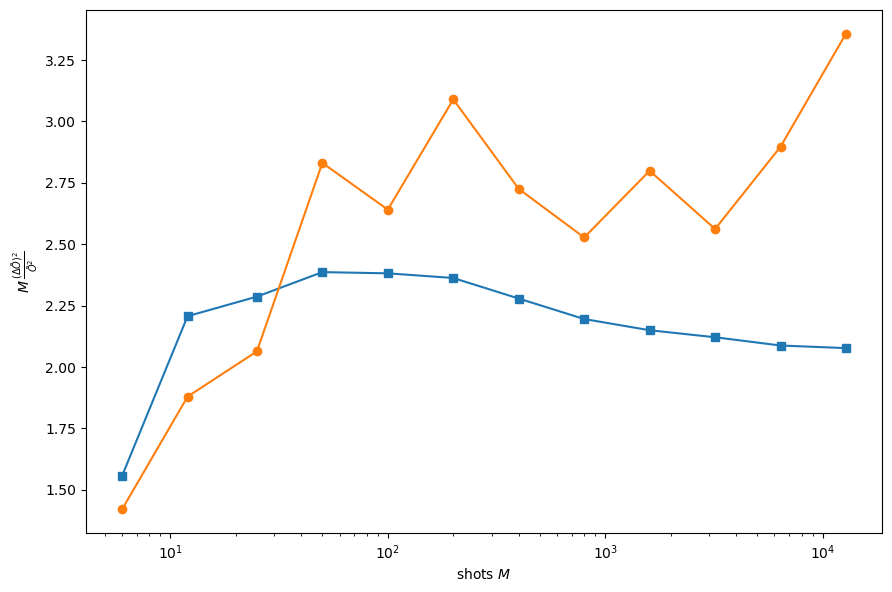

In [ ]:
x_dat = M_list
y_dat = np.zeros(len(intermediate_results_list))
y_true_dat = np.zeros(len(intermediate_results_list))

H_mean = Hamiltonian_Mean(P,cc,psi).real

fig, ax = plt.subplots(figsize=(9,6))

for j in range(len(intermediate_results_list)): 
    y_dat[j] = (results[j,1]**2 + results[j,3] ) * intermediate_results_list[j]/ (H_mean)**2  
    y_true_dat[j] = results[j,2]**2 * intermediate_results_list[j]/ (H_mean)**2
        
ax.plot(x_dat, y_true_dat, marker='s',label='True Error (uncorrected)')
ax.plot(x_dat, y_dat, marker='o',label='Estimated Error')
ax.set_xscale('log')
ax.set_ylabel(r'$M \, \frac{(\Delta \tilde{O})^2}{\tilde{O}^2}$')
ax.set_xlabel(r'shots $M$')
    
plt.tight_layout(pad=1, w_pad=1, h_pad=1)
plt.show()